In [1]:
## import packages and files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

df = pd.read_csv("states_all.csv")

# Thinkful Challenge: Preparing a dataset for modeling

## Choosing Variables to Act as the Basis for Features

In [2]:
## View First 5 Rows of Data in The Dataset
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [3]:
## View Variables and Their Current Data Types
df.dtypes
# (or df.columns)

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


<b> Outcome Variable: </b> <br>
Average 8th Grade Math Scores (AVG_MATH_8_SCORE)

<b>Categorical Variable: </b><br>
State (STATE) <br>
<b>Continuous Variables: </b><br>
Year (YEAR) <br>
Instruction Expenditure (INSTRUCTION_EXPENDITURE) <br>
8th Grade Enrollment (GRADES_8_G) <br>
4th Grade Math Scores (AVG_MATH_4_SCORE) 


In [4]:
## Store a DataFrame with the Variables I will Use to Make features

variables_for_features = df.loc[:,['YEAR',  'STATE', 'INSTRUCTION_EXPENDITURE', 'GRADES_8_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE']]

## Exploring Variables Using Univariate And Bivariate Methods

### Descriptive Statistics

In [5]:
## Descriptive Statistics

df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


### Scatterplot Matrix

In [6]:
## Set Plot Style

sns.set_style("white")

In [7]:
## Create DataFrame with only continuous variabes for plots

vff_continuous_only = variables_for_features.loc[:,['YEAR', 'INSTRUCTION_EXPENDITURE', 'GRADES_8_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE']].dropna()

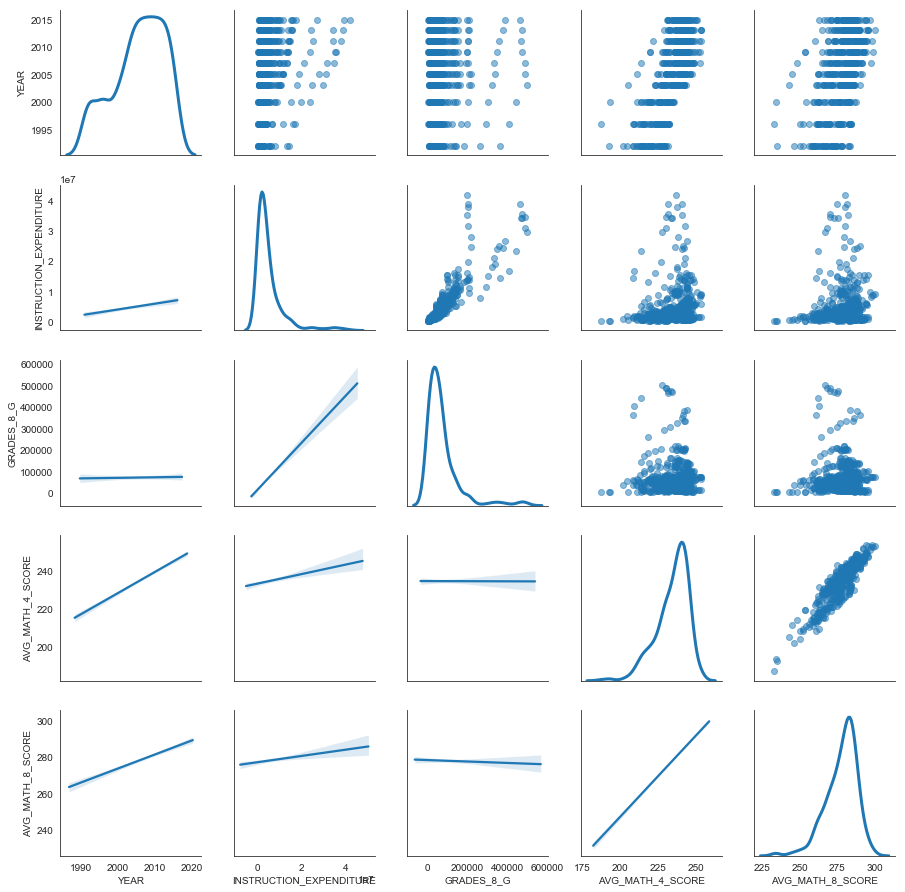

In [8]:
## Create a Scatterplot Matrix

g = sns.PairGrid(vff_continuous_only, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

### Correlation Matrix

                             YEAR  INSTRUCTION_EXPENDITURE  GRADES_8_G  \
YEAR                     1.000000                 0.193604    0.020664   
INSTRUCTION_EXPENDITURE  0.193604                 1.000000    0.881218   
GRADES_8_G               0.020664                 0.881218    1.000000   
AVG_MATH_4_SCORE         0.719773                 0.159678   -0.002372   
AVG_MATH_8_SCORE         0.509774                 0.112391   -0.032015   

                         AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  
YEAR                             0.719773          0.509774  
INSTRUCTION_EXPENDITURE          0.159678          0.112391  
GRADES_8_G                      -0.002372         -0.032015  
AVG_MATH_4_SCORE                 1.000000          0.911608  
AVG_MATH_8_SCORE                 0.911608          1.000000  


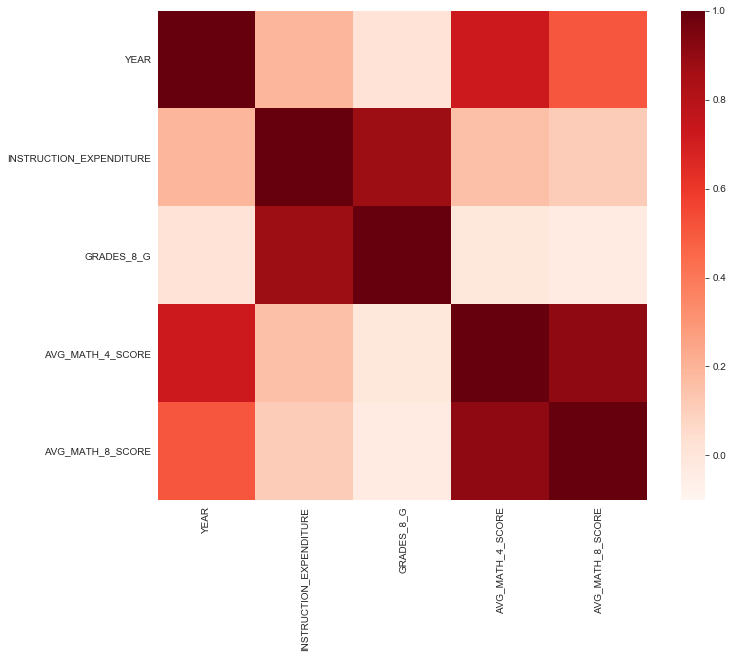

In [9]:
## Make a correlation matrix

corrmat = vff_continuous_only.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-0.1, vmax=1, cmap='Reds', square=True)
plt.show()

## Creating Features

In [10]:
## View Variables for Features Data

variables_for_features.head()

,YEAR,STATE,INSTRUCTION_EXPENDITURE,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE
0,1992,ALABAMA,1481703.0,58025.0,208.327876,252.187522
1,1992,ALASKA,498362.0,8789.0,NaN,NaN
2,1992,ARIZONA,1435908.0,49081.0,215.253932,265.366278
3,1992,ARKANSAS,964323.0,36011.0,210.206028,256.312090
4,1992,CALIFORNIA,14358922.0,363296.0,208.398961,260.892247


In [11]:
## Make Features DataFrame and Store State Features

features = pd.get_dummies(variables_for_features['STATE'])


## View Different States (for personal reference)

#len(variables_for_features.STATE.unique())
variables_for_features.STATE.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING',
       'BUREAU_OF_INDIAN_AFFAIRS', 'DOD_OVERSEAS', 'DOD_DOMESTIC',
       'AMERICAN_SAMOA', 'GUAM', 'NORTHERN_MARIANAS', 'PUERTO_RICO',
       'VIRGIN_ISLANDS', 'BI', 'DD', 'NORTHERN_MARIANA_ISLANDS',
       'DEPARTMENT_OF_DEFENSE', 'BUREAU_OF_INDIAN_EDUCATION',
       'DEPART

**A feature was made for each of 80 STATE variables listed above to capture the impact that State may have on 8th grade math test scores**

In [12]:
## Create a feature for most educated states (states with the highest high school graduation rates)

features['most_educated'] = np.where(variables_for_features['STATE'].isin(['TEXAS', 'NEW_HAMPSHIRE', 'MINNESOTA', 'WYOMING', 'ALASKA']), 1, 0)
#print(pd.crosstab(features['most_educated'], variables_for_features['STATE']))

**A feature was made denoting the states with the highest high school graduation rates, higher graduation rates may have an effect on 8th grade math test scores**

In [13]:
## Create a feature for states with significantly lower enrollment numbers

features['low_enroll'] = np.where(variables_for_features['GRADES_8_G'] > 1000000, 1, 0)

**A feature was made denoting the states with low enrollment numbers. This could result in lower student teacher ratios which could be related to test scores**

In [14]:
## Scaling then combining GRADES_8_G and INSTRUCTION_EXPENDITURE
means = variables_for_features[['GRADES_8_G', 'INSTRUCTION_EXPENDITURE']].mean(axis=0)
stds = variables_for_features[['GRADES_8_G', 'INSTRUCTION_EXPENDITURE']].std(axis=0)

features['enroll_iexpenditure'] = ((variables_for_features[['GRADES_8_G', 'INSTRUCTION_EXPENDITURE']] - means)/stds).mean(axis=1)

**A feature was made combining enrollment numbers and instruction expenditure since they were highly correlated.**

In [15]:
## a feature representing the interaction of highly educated states and grade 4 math scores


features['AVG_MATH_4_SCORE'] = variables_for_features['AVG_MATH_4_SCORE']
features['high_4_score_education'] =  features['most_educated'] * features['AVG_MATH_4_SCORE']

**A feature was made representing the interaction between highly educated states and average grade 4 math score since more educated states may have stronger elementary schools.**

## Choosing Features

In order of most to least useful: <br>
features['most_educated'] 5 <br>
features['STATE'] 4 <br>
features['enroll_iexpenditure'] 3 <br>
features['low_enroll'] 2 <br>
features['high_4_score_education'] 1 <br>

If we choose to set the cutoff at 3, we're left with the 'most_educated', 'STATE', and 'enroll_iexpenditure' features.